# Introduction

#### Reference Book: [Introduction to Machine Learning with Python by Andreas C. Müller, Sarah Guido](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/)

While we build a machine learning solution, we need to keep in mind of the following questions all the time:
+ What question(s) am I trying to answer? 
+ Do I think the data collectedcan answer that question?
+ What is the best way to phrase my question(s) as a machine learningproblem?
+ Have I collected enough data to represent the problem I want to solve?
+ What features of the data did I extract, and will these enable theright predictions?
+ How will I measure success in my application?
+ How will the machine learning solution interact with other parts of myresearch or business product?

------

# Essential Libraries and Tools

### Numpy

In [1]:
import numpy as np

In [2]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print('x:\n{}'.format(x))

x:
[[1 2 3]
 [4 5 6]]


### Scipy

In [3]:
from scipy import sparse

In [4]:
# create 2D numpy array 
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [5]:
# convert to sparse matrix in CRS format
# only the non zeros are retained

sparse_matrix = sparse.csr_matrix(eye)
print("SciPy sparse CSR matrix: \n", sparse_matrix)

SciPy sparse CSR matrix: 
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
data = np.ones(4)
data

array([1., 1., 1., 1.])

In [7]:
# using COO format
row_indices = np.arange(4)
col_indices = np.arange(4)

eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))

print('COO representation: \n', eye_coo)

COO representation: 
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### Matplotlib

In [8]:
import matplotlib.pyplot as plt

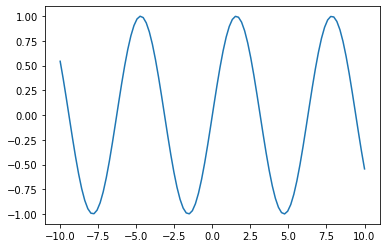

In [9]:
x = np.linspace(-10, 10, 100) # Generate a sequence of numbers from -10 to 10 with 100 steps in between
y = np.sin(x)

plt.plot(x, y);

### Pandas

In [10]:
import pandas as pd

In [11]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Location': ['New York', 'Paris', 'Berlin', 'London'],
    'Age': [24, 13, 53, 33]
}

In [12]:
df = pd.DataFrame(data)
df.head()

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [13]:
df[df['Age'] > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [14]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 0.23.2


-----------

---------

# A First Application: Classifying Iris Species

![sepal_petal](images/iris_petal_sepal.png)

### 1) Load the data

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris_dataset = load_iris()

In [17]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
# we want to predict
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
# feature names
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
type(iris_dataset['data'])

numpy.ndarray

In [23]:
iris_dataset['data'].shape

(150, 4)

## 2) Measuring Success: Training and Testing Data

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X = iris_dataset['data']
y = iris_dataset['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [31]:
X_test.shape, y_test.shape

((38, 4), (38,))

## 3) First Things First: Look at your data

In real world, data consistency is rare. So we have ensure our data are consistent or not by visualzing it.

In [33]:
import seaborn as sns

In [50]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

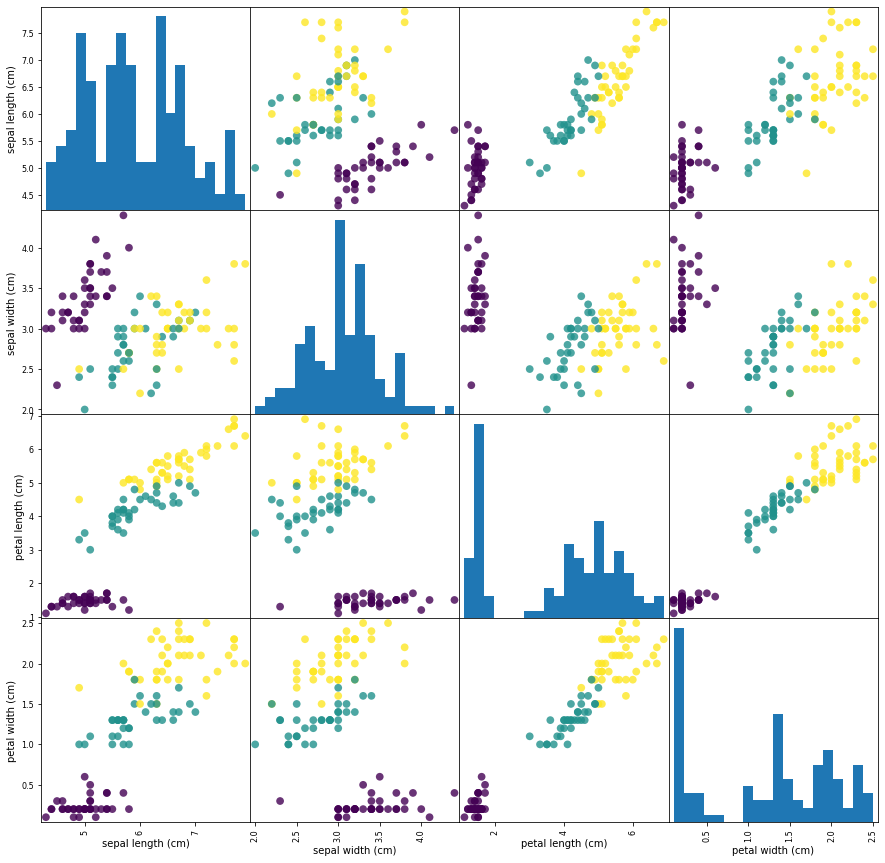

In [62]:
pd.plotting.scatter_matrix(iris_df, c=y_train, 
                                          figsize=(15, 15), marker='o',
                                          hist_kwds={'bins': 20}, 
                                          s=60, alpha=0.8, cmap='viridis')

We can see that the three classes seem to be relatively well separated usin Sepal Width and Petal Length measurements.


## 4) Building Model: k-Nearest Neighbors

To make prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point.

Then it assigns the label of the training point to the new data point.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 5) Making Predictions

Imagine .. we find a wild iris flower with a speal length of 5cm, speal width of 2.9cm, petal length of 1cm and petal width of 0.2cm.

What specifes of iris flower would this be?

In [69]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # we need to make it as 2D array as sklearn expects 2D numpy array

In [70]:
X_new.shape

(1, 4)

In [71]:
prediction = knn.predict(X_new)

print('prediction: ', prediction)
print('predicted target name: ', iris_dataset['target_names'][prediction])

prediction:  [0]
predicted target name:  ['setosa']


our model predicts as Setosa. But how do we know whether it is correct or not?

## 6) Evaluating the Model

In [72]:
y_pred = knn.predict(X_test)

In [74]:
print('Test Set Prediction: \n', y_pred)

Test Set Prediction: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [75]:
print('Test Set score: {:.2f}'.format(np.mean(y_pred == y_test)))

Test Set score: 0.97


In [76]:
# using knn built in score
print('Test Set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test Set score: 0.97


Based on the score, we made the right prediction of 97% of the irises in the test set.

--------

# Summary and Outlook

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
